<div style="background-color: #eee3d3">
<h1> 7-classification.ipynb </h1>
</div>

---

# The purpose of this notebook is to use different methods to classify samples



---

## References

- https://www.dataquest.io/blog/learning-curves-machine-learning/
- https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
- https://scikit-learn.org/stable/modules/permutation_importance.html

# Import modules

In [1]:
import os

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
import re
pwd = ! pwd
pwd = re.sub('notebooks', '', pwd[0])
print(f'Working directory : {pwd}')

import sys
sys.path.append(pwd + 'bin/')

from classification_functions import *

Working directory : /home/jovyan/work/


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

# Import reduced data from previous notebook

In [4]:
path_peakTable = pwd + 'data/peakTable/reduced_peakTable/'
reduced_peakTables = [file for file in os.listdir(path_peakTable) if file.endswith('.csv')]
print(f'Available reduced peak tables :\n')
reduced_peakTables

Available reduced peak tables :



['peakTable-PCA_70percent.csv',
 'peakTable-PCA_95percent-UMAP_3comp.csv',
 'peakTable-PCA_95percent-tSNE_2comp.csv',
 'peakTable-PCA_95percent-tSNE_3comp.csv',
 'peakTable-PCA_95percent.csv',
 'peakTable-UMAP_2comp.csv',
 'peakTable-UMAP_3comp.csv',
 'peakTable-kBest_20.csv',
 'peakTable-kBest_34.csv',
 'peakTable-kBest_61.csv',
 'peakTable-tSNE_2comp.csv',
 'peakTable-tSNE_3comp.csv']

In [5]:
chosen_peakTable = 'peakTable-PCA_70percent.csv'
peakTable = pd.read_csv(path_peakTable + chosen_peakTable, sep=',', decimal='.', na_values='NA')
peakTable

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,PC1,PC2,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,-12.372109,-2.043059,...,1.461407,4.244780,-0.249895,-0.925630,-0.780152,-2.054856,-0.757418,-4.515187,0.387069,0.563967
1,LivCan_154,Non-case,82,Non-case,No,41____41046868,41____41046868,41046868-s2#C,-6.619444,-1.036887,...,-0.371352,1.965933,4.861848,-0.188043,-0.430698,-1.147008,-0.431699,1.541463,-0.369836,-0.929039
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,-6.178319,-6.451937,...,-0.588610,3.636261,-0.148694,1.611710,-1.298399,-2.136407,-3.372794,1.661457,-1.141111,-1.827403
3,LivCan_268,Non-case,427,Non-case,No,41____41089214,41____41089214,41089214-s1#B,-9.124357,-6.556480,...,-1.340590,2.463347,-2.223353,0.344023,-0.784697,-2.540689,-1.521398,-0.062131,-1.753967,0.281867
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,-4.229493,-10.779293,...,0.913470,-0.107138,-0.543639,-0.569719,1.502887,-3.615806,-1.153048,0.075981,-2.185504,-2.383102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,Non-case,No,32____3208004E,32____32253231,32253231-s3#C,1.803461,1.922454,...,-1.611530,4.978986,-1.609048,-3.024519,3.154007,-0.143627,-2.207852,-2.676008,1.803767,1.844707
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B,1.824354,10.298834,...,2.406762,2.778722,1.489667,-2.285347,0.060081,-0.987799,0.283471,-1.528250,-0.532753,-1.249068
183,LivCan_376,Non-case,383,Non-case,No,22____22281701,22____22281701,22281701-s1#B,8.827928,2.809567,...,-0.140333,0.401475,-0.574732,2.496982,-1.060755,0.834660,0.330676,-1.450272,0.330975,0.102053
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C,3.359106,6.859640,...,-2.265300,4.555769,-3.016074,0.366485,0.410747,0.371338,-1.080834,0.168764,1.281802,0.005730


In [6]:
col_prefix = re.sub('peakTable-', '', re.sub('.csv', '', chosen_peakTable)).split('-')[-1].split('_')[0]
if col_prefix == 'kBest' : col_prefix = 'variable_'
if col_prefix == 'PCA' : col_prefix = 'PC'
col_prefix

'PC'

In [7]:
metadata = peakTable.iloc[:, [col_prefix not in col for col in peakTable.columns]]
metadata

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,Non-case,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,Non-case,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,Non-case,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,Non-case,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


In [8]:
X = peakTable.iloc[:, [col_prefix in col for col in peakTable.columns]]
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,-12.372109,-2.043059,-3.261698,0.430363,4.269989,0.939417,0.664265,-0.267621,1.883309,0.512214,...,1.461407,4.244780,-0.249895,-0.925630,-0.780152,-2.054856,-0.757418,-4.515187,0.387069,0.563967
1,-6.619444,-1.036887,-4.825797,-7.892051,4.473196,7.474913,2.972063,-0.679043,-0.398766,3.957368,...,-0.371352,1.965933,4.861848,-0.188043,-0.430698,-1.147008,-0.431699,1.541463,-0.369836,-0.929039
2,-6.178319,-6.451937,0.216316,-0.336971,3.268509,-0.351904,3.361514,1.504637,1.773554,-0.439789,...,-0.588610,3.636261,-0.148694,1.611710,-1.298399,-2.136407,-3.372794,1.661457,-1.141111,-1.827403
3,-9.124357,-6.556480,0.056527,-0.308370,-0.204270,4.008856,-0.137532,1.881414,-2.466897,1.671776,...,-1.340590,2.463347,-2.223353,0.344023,-0.784697,-2.540689,-1.521398,-0.062131,-1.753967,0.281867
4,-4.229493,-10.779293,4.640299,-4.065250,5.467090,-7.372899,1.694997,-3.111410,1.941444,1.120718,...,0.913470,-0.107138,-0.543639,-0.569719,1.502887,-3.615806,-1.153048,0.075981,-2.185504,-2.383102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.803461,1.922454,-1.699863,-7.086195,-0.992577,-1.464068,-2.944835,0.421351,-3.520668,2.028967,...,-1.611530,4.978986,-1.609048,-3.024519,3.154007,-0.143627,-2.207852,-2.676008,1.803767,1.844707
182,1.824354,10.298834,-3.895671,-1.744359,1.796563,-5.284780,-1.436543,1.535927,3.448473,-0.295000,...,2.406762,2.778722,1.489667,-2.285347,0.060081,-0.987799,0.283471,-1.528250,-0.532753,-1.249068
183,8.827928,2.809567,-2.420940,-4.340115,0.457351,-1.307642,-0.602169,-3.289612,2.381454,-1.449033,...,-0.140333,0.401475,-0.574732,2.496982,-1.060755,0.834660,0.330676,-1.450272,0.330975,0.102053
184,3.359106,6.859640,-4.879737,-1.896727,-0.556661,-1.860155,1.866356,0.884209,-1.428245,5.293333,...,-2.265300,4.555769,-3.016074,0.366485,0.410747,0.371338,-1.080834,0.168764,1.281802,0.005730


# Evaluation function

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    axes[0].set_title(title, fontsize=16)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid(visible=True)
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid(visible=True)
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model", fontsize=16)

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid(visible=True)
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model", fontsize=16)

    return plt

def evaluation(X, y, model, plot_hist_score=False, score='f1-score'):
    
    # Encode target variable y
    le = LabelEncoder()
    le.fit(y)
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Corresponding classes to labels : {le_name_mapping}\n')
    y = le.transform(y)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0, stratify=y)

    # Fit model and predict with test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    #print(confusion_matrix(y_test, y_pred))
    df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=le.classes_, columns=le.classes_)
    df_confusion_matrix.index.name = 'true/pred'
    print('Confusion matrix :')
    display(df_confusion_matrix)
    print()
    
    # Classification report
    #print(classification_report(y_test, y_pred))
    pd.options.display.float_format = '{:.2f}'.format
    df_classification_report = pd.DataFrame(classification_report(y_test, y_pred, target_names=le_name_mapping.keys(), output_dict=True)).transpose()
    print('Classification report :')
    display(df_classification_report)
    print()
    
    if plot_hist_score:
        curr_score = df_classification_report.loc[le_name_mapping.keys(), score]
    else:
        curr_score = None
        
    # Plots
    title = f'Learning Curves ({type(model).__name__})'
    fig, axes = plt.subplots(3, 1, figsize=(8, 18))
    fig.subplots_adjust(hspace=0.3)
    plot_learning_curve(
        model, title, X, y, axes=axes, ylim=(-0.01,1.1), cv=4, n_jobs=4
    )
    plt.show()
    
    return curr_score

#N, train_score, val_score = learning_curve(model, X, y, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
#train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X, y, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10), return_times=True)

#fig = plt.figure(figsize=(8, 6))
#plt.plot(train_sizes, train_scores.mean(axis=1), label='train score')
#plt.plot(train_sizes, test_scores.mean(axis=1), label='validation score')
#plt.ylim(-0.1,1.1)
#plt.legend()
#plt.show()


# 1 - Ridge classification

https://scikit-learn.org/stable/modules/linear_model.html#classification

In [9]:
from sklearn.linear_model import RidgeClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.62,0.67,24.00
Non-case,0.65,0.74,0.69,23.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.68,0.68,0.68,47.00
weighted avg,0.68,0.68,0.68,47.00


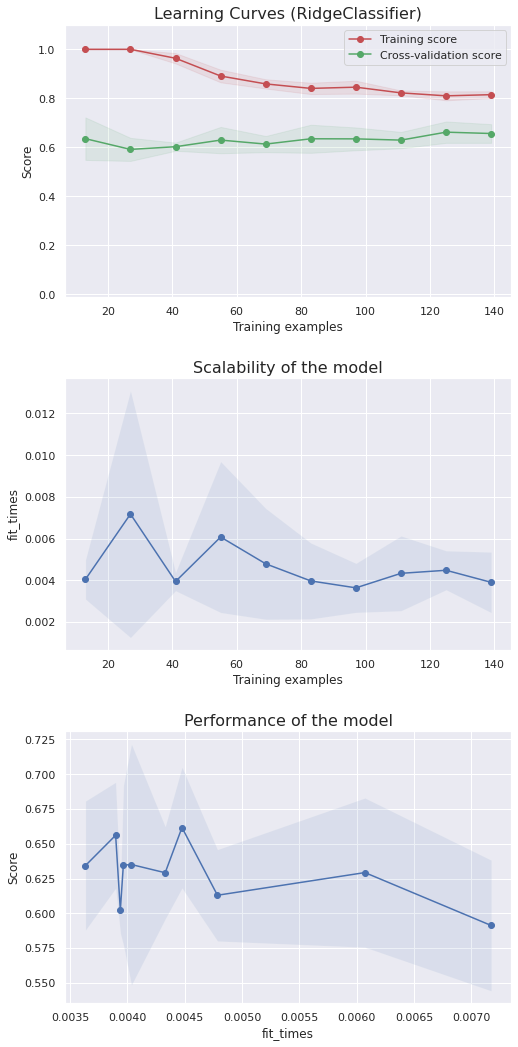

In [10]:
model = RidgeClassifier()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 2 - Logistic regression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [11]:
from sklearn.linear_model import LogisticRegression

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,18,6
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.78,0.75,0.77,24.00
Non-case,0.75,0.78,0.77,23.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,47.00
weighted avg,0.77,0.77,0.77,47.00


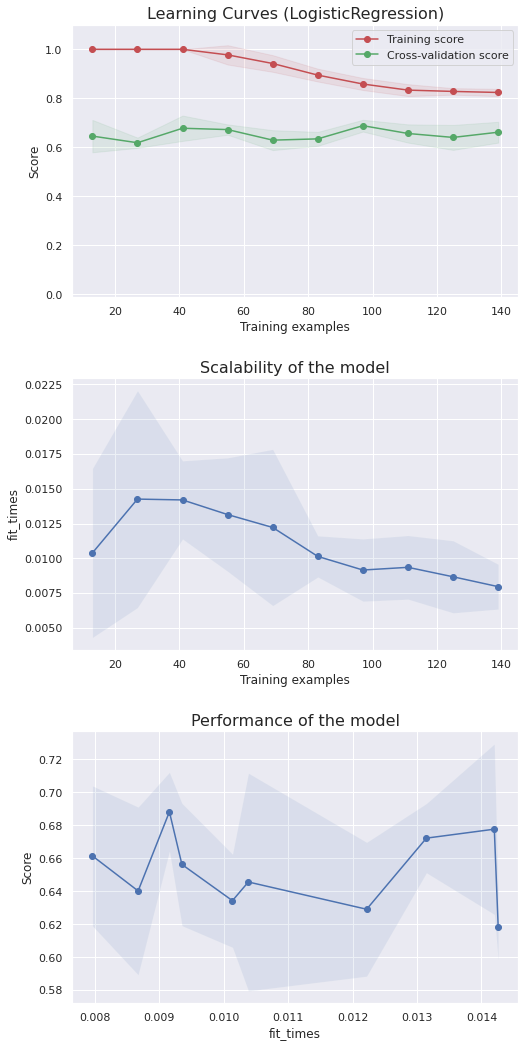

In [12]:
model = LogisticRegression()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 3 - Linear Discriminant Analysis

https://scikit-learn.org/stable/modules/lda_qda.html#mathematical-formulation-of-the-lda-and-qda-classifiers

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.62,0.67,24.00
Non-case,0.65,0.74,0.69,23.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.68,0.68,0.68,47.00
weighted avg,0.68,0.68,0.68,47.00


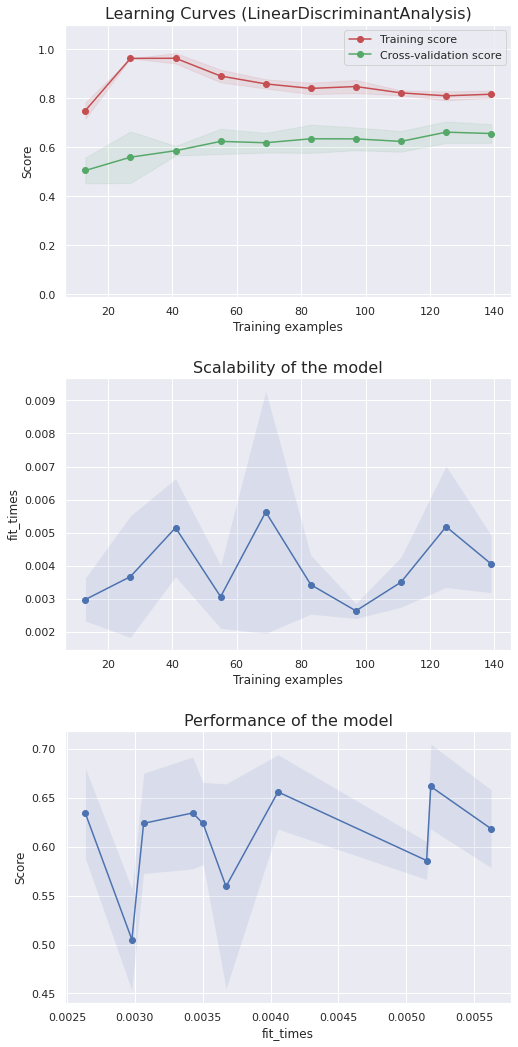

In [14]:
model = LinearDiscriminantAnalysis()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 4 - SVC

https://scikit-learn.org/stable/modules/svm.html#classification

In [15]:
from sklearn.svm import SVC

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,14,10
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.70,0.58,0.64,24.00
Non-case,0.63,0.74,0.68,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.67,0.66,0.66,47.00


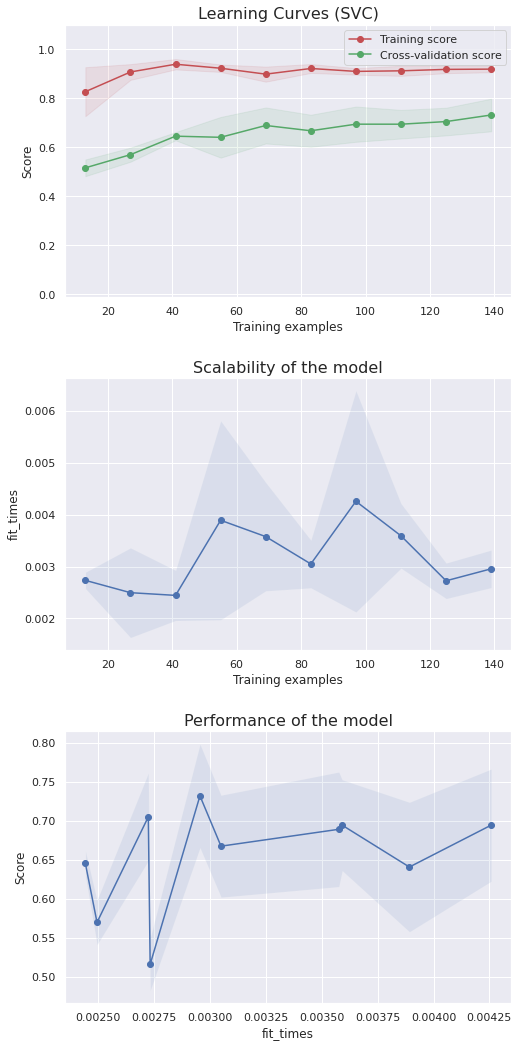

In [16]:
model = SVC(random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 5 - Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/sgd.html#classification

In [17]:
from sklearn.linear_model import SGDClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,19,5
Non-case,7,16



Classification report :


,precision,recall,f1-score,support
Incident,0.73,0.79,0.76,24.00
Non-case,0.76,0.70,0.73,23.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.75,0.74,0.74,47.00
weighted avg,0.75,0.74,0.74,47.00


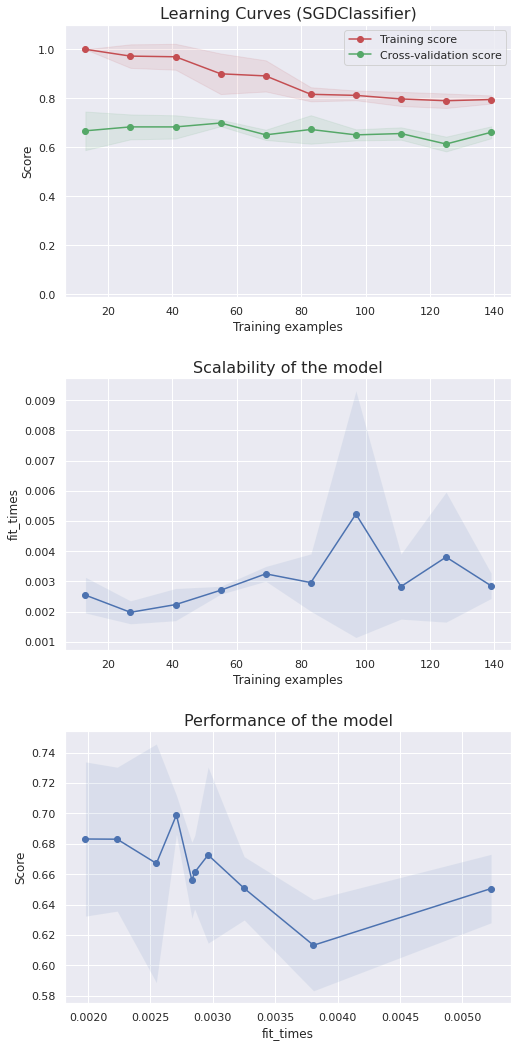

In [18]:
model = SGDClassifier()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 6 - Nearest Neighbors Classification

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.50,0.59,24.00
Non-case,0.60,0.78,0.68,23.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.65,0.64,0.63,47.00
weighted avg,0.65,0.64,0.63,47.00


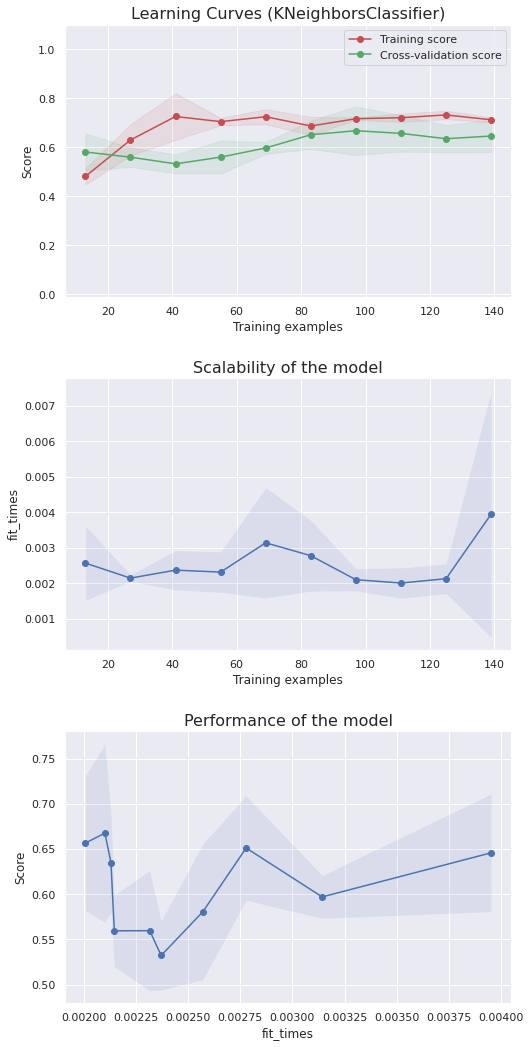

In [20]:
model = KNeighborsClassifier()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 7 - Nearest Centroid Classifier

In [21]:
from sklearn.neighbors import NearestCentroid

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,18,6
Non-case,8,15



Classification report :


,precision,recall,f1-score,support
Incident,0.69,0.75,0.72,24.00
Non-case,0.71,0.65,0.68,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.70,0.70,0.70,47.00
weighted avg,0.70,0.70,0.70,47.00


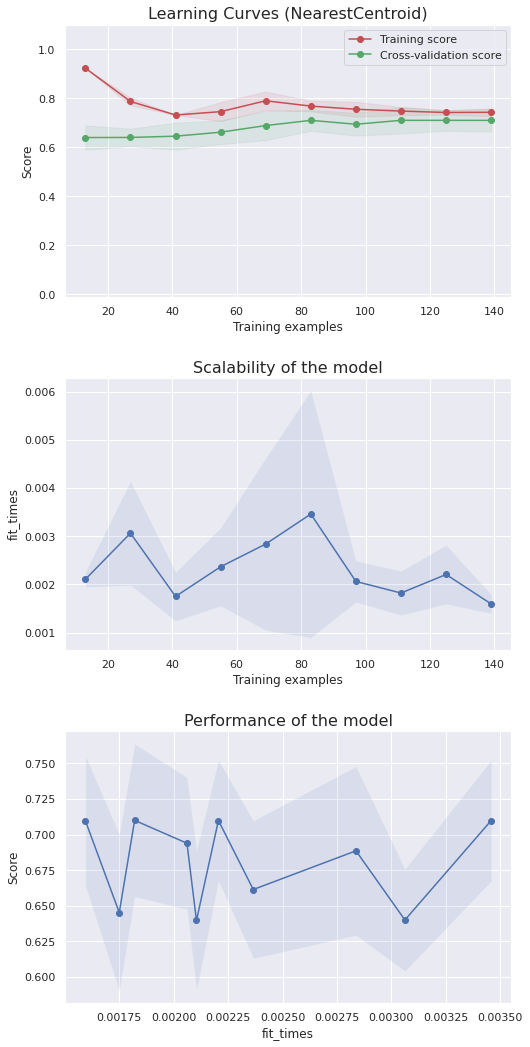

In [22]:
model = NearestCentroid()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 7 - Gaussian Process Classifier

https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc

In [23]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,7,16



Classification report :


,precision,recall,f1-score,support
Incident,0.68,0.62,0.65,24.00
Non-case,0.64,0.70,0.67,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.66,0.66,0.66,47.00


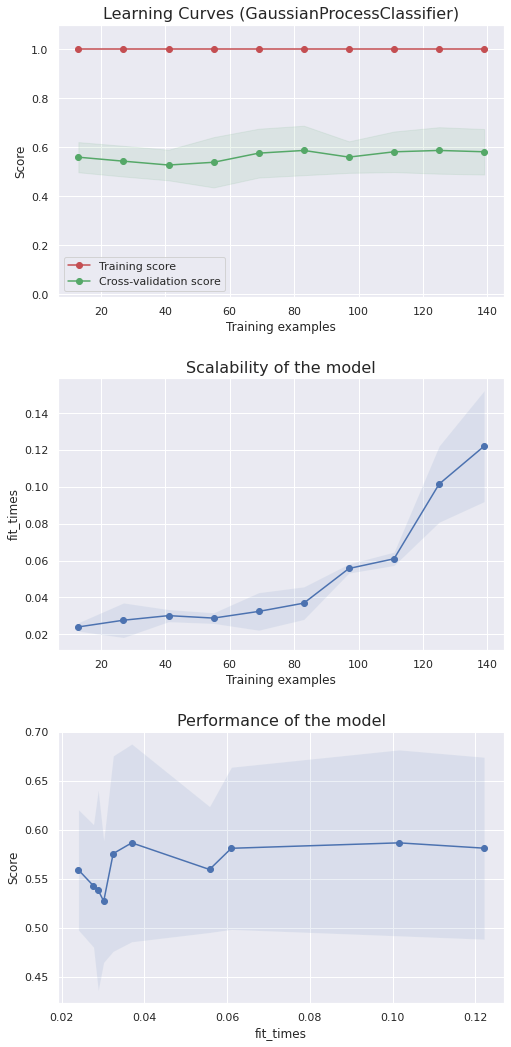

In [24]:
model = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))

evaluation(X=X, y=peakTable['Groups'], model=model)

# 8 - Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,16,8
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.76,0.67,0.71,24.00
Non-case,0.69,0.78,0.73,23.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.73,0.72,0.72,47.00
weighted avg,0.73,0.72,0.72,47.00


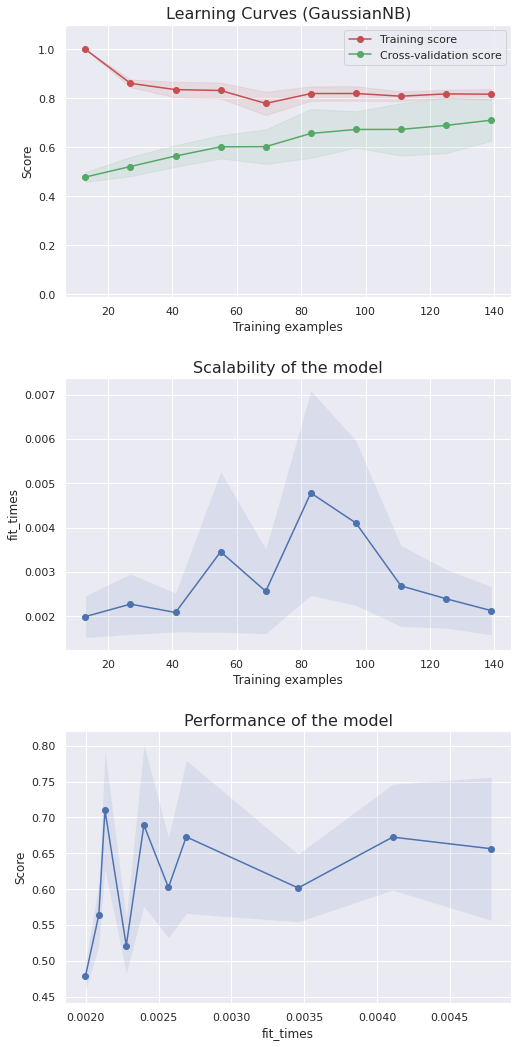

In [26]:
model = GaussianNB()

evaluation(X=X, y=peakTable['Groups'], model=model)

# 9 - Decision Trees

https://scikit-learn.org/stable/modules/tree.html#classification

In [27]:
from sklearn.tree import DecisionTreeClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,12,11



Classification report :


,precision,recall,f1-score,support
Incident,0.50,0.50,0.50,24.00
Non-case,0.48,0.48,0.48,23.00
accuracy,0.49,0.49,0.49,0.49
macro avg,0.49,0.49,0.49,47.00
weighted avg,0.49,0.49,0.49,47.00


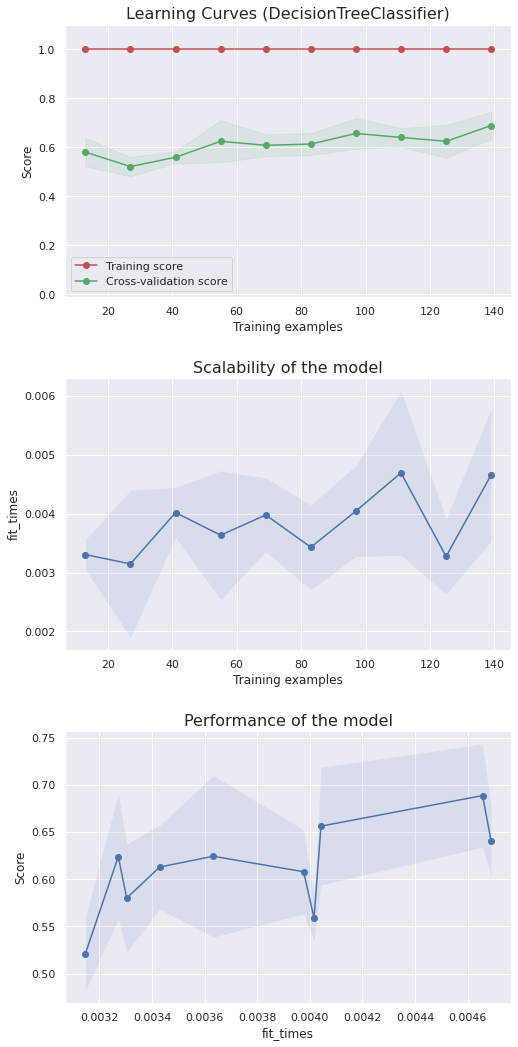

In [28]:
model = DecisionTreeClassifier(random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 10 - Random Forest

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

In [29]:
from sklearn.ensemble import RandomForestClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,16,8
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.73,0.67,0.70,24.00
Non-case,0.68,0.74,0.71,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.70,0.70,0.70,47.00
weighted avg,0.70,0.70,0.70,47.00


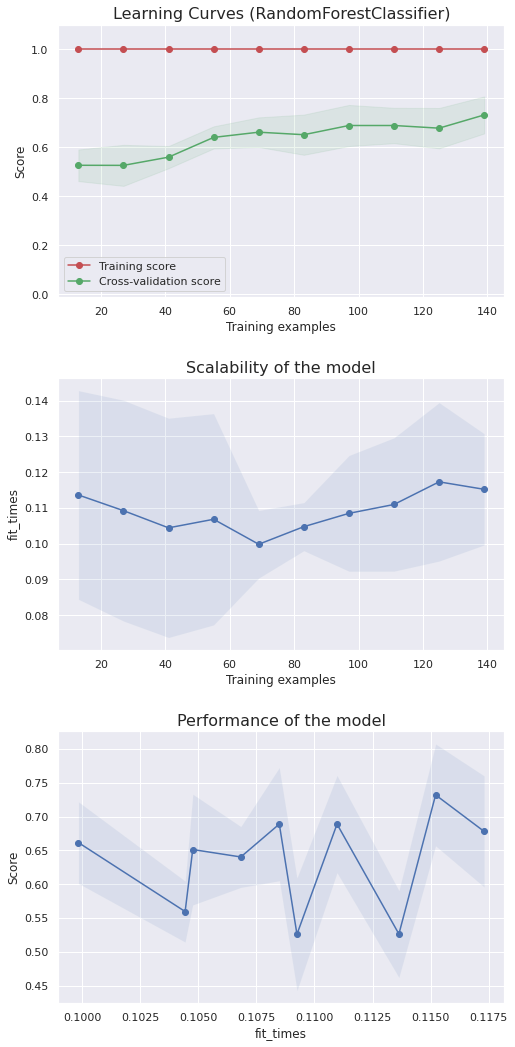

In [30]:
model = RandomForestClassifier(random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 11 - Extremely Randomized Trees

https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,14,10
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.70,0.58,0.64,24.00
Non-case,0.63,0.74,0.68,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.67,0.66,0.66,47.00


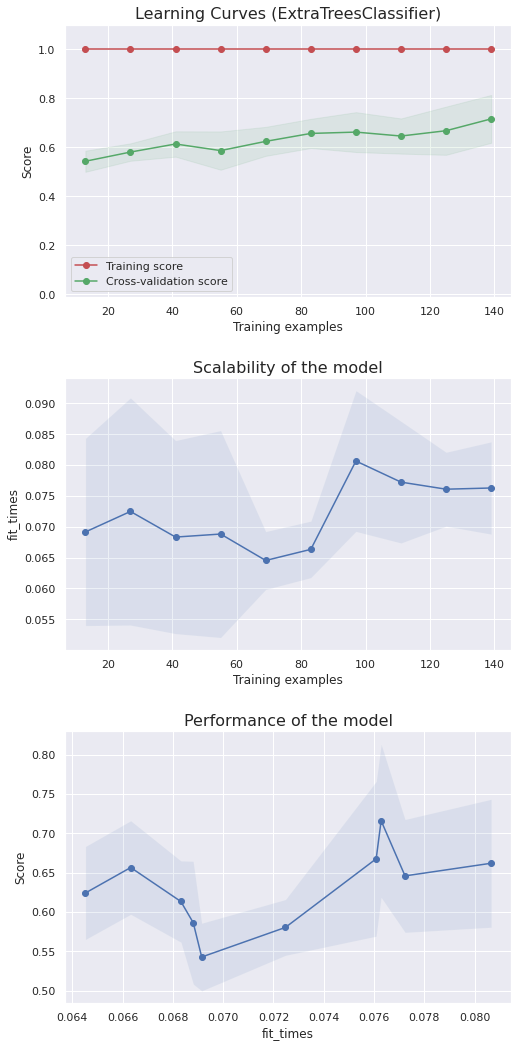

In [32]:
model = ExtraTreesClassifier(random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 12 - AdaBoost

https://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,2,21



Classification report :


,precision,recall,f1-score,support
Incident,0.88,0.62,0.73,24.00
Non-case,0.70,0.91,0.79,23.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.79,0.77,0.76,47.00
weighted avg,0.79,0.77,0.76,47.00


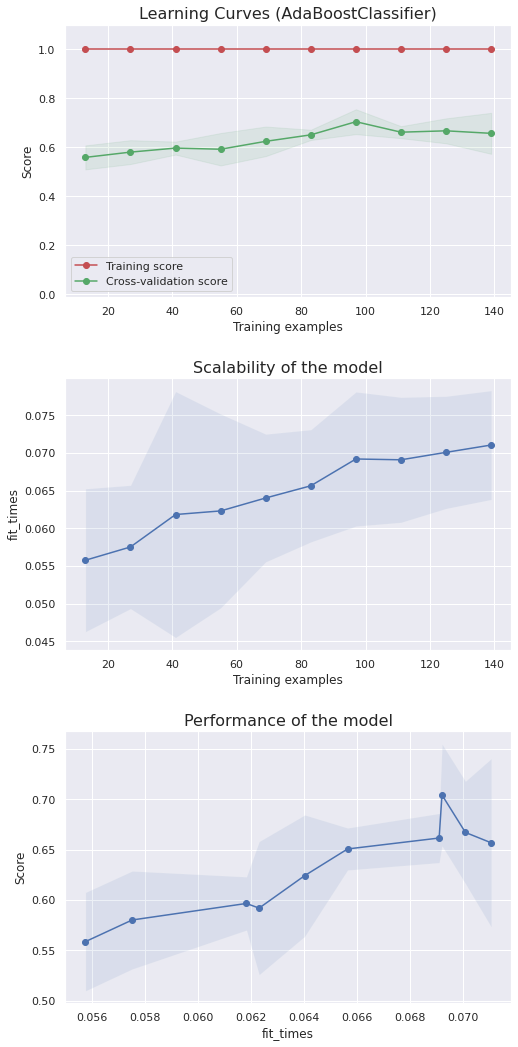

In [34]:
model = AdaBoostClassifier(random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 12 - Gradient Tree Boosting

https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,13,11
Non-case,3,20



Classification report :


,precision,recall,f1-score,support
Incident,0.81,0.54,0.65,24.00
Non-case,0.65,0.87,0.74,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.73,0.71,0.70,47.00
weighted avg,0.73,0.70,0.69,47.00


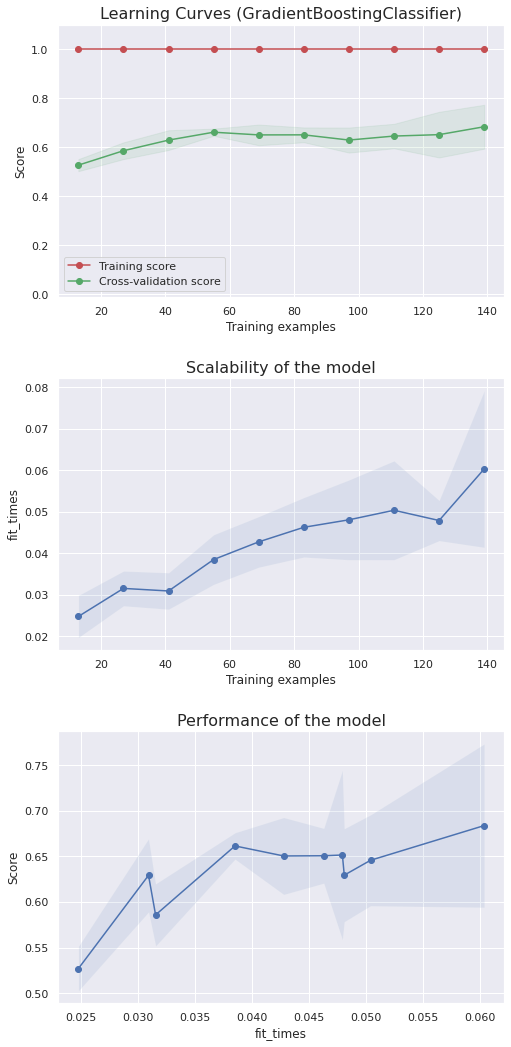

In [36]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

evaluation(X=X, y=peakTable['Groups'], model=model)

# 13 - Histogram-Based Gradient Boosting

https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting

In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.50,0.59,24.00
Non-case,0.60,0.78,0.68,23.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.65,0.64,0.63,47.00
weighted avg,0.65,0.64,0.63,47.00


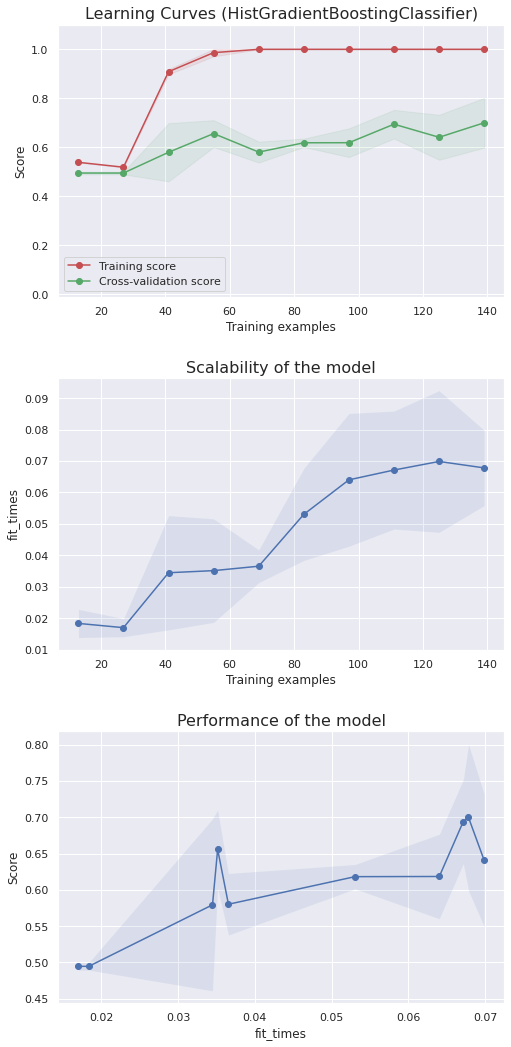

In [38]:
model = HistGradientBoostingClassifier(max_iter=100)

evaluation(X=X, y=peakTable['Groups'], model=model)

# (TODO) - Bagging meta-estimator

https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

# (TODO) 14 - Voting Classifier

https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

# 15 - Neural network - Multi-layer Perceptron

In [39]:
from sklearn.neural_network import MLPClassifier

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.75,0.62,0.68,24.00
Non-case,0.67,0.78,0.72,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.71,0.70,0.70,47.00
weighted avg,0.71,0.70,0.70,47.00


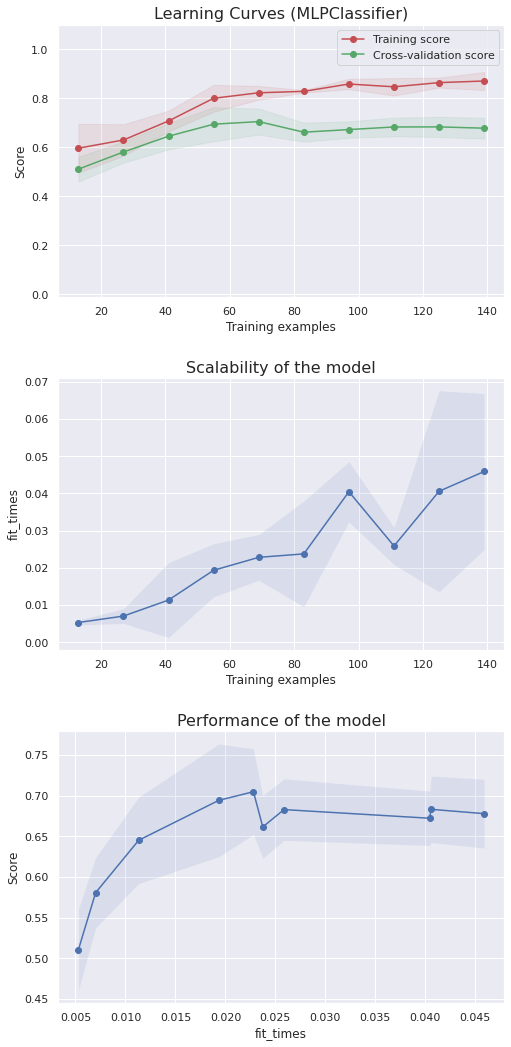

In [40]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)

evaluation(X=X, y=peakTable['Groups'], model=model)

# Pipeline

def pipeline_classification(X, y, dict_models={}, plot_hist_score=False, score='f1-score'):
    
    t0 = time.time()
    
    # Assert input arguments
    if plot_hist_score:
        # assert score != None
        assert not isinstance(score, type(None)),\
            'If <plot_hist_score> is set to True, <score> has to be provided'
        assert score in ['precision', 'recall', 'f1-score'],\
            '<score> argument has to be one of ["precision", "recall", "f1-score"]'
    
    
    
    def print_header(model):
        nb_pre = (150 - (2 + len(str(model))))//2
        nb_suf = 150 - (nb_pre + len(str(model)) + 2)
        header = (nb_pre - 1) * '#' + (len(str(model)) + 2) * '-' + nb_suf * '#' + '\n'
        header += (nb_pre - 2) * '#' + '| ' + str(model) + ' |' + (nb_suf - 1) * '#' + '\n'
        header += (nb_pre - 1) * '#' + (len(str(model)) + 2) * '-' + nb_suf * '#' + '\n'
        print(header)
    
    
    if plot_hist_score:
        df_scores = pd.DataFrame()
    
    for model_str in dict_models:
    
        print_header(model_str)
        
        curr_score = evaluation(X=X, y=y, model=dict_models[model_str], plot_hist_score=plot_hist_score, score=score)
        
        if plot_hist_score:
            df_scores[model_str] = curr_score
            
        print(2 * '\n')
    print(150 * '#', '\n')

    
    def _plot_hist_score(df_scores, target_name):
        
        df_scores_melt = pd.melt(df_scores.reset_index(), id_vars='index', var_name='model', value_name='score').rename(columns={'index': target_name})

        plt.figure(figsize=(len(dict_models)* 2, 6))
        ax = sns.barplot(x='model', y='score', hue=target_name, data=df_scores_melt)
        for i in range(df_scores.shape[0]):
            ax.bar_label(ax.containers[i], fmt='%.2f')
        ax.set(ylim=(0, 1))
        ax.set_title(f'{score} for each model', fontsize=16)
        plt.xticks(rotation=45);
        plt.show()

    
    if plot_hist_score:
        target_name = y.name
        _plot_hist_score(df_scores, target_name)
        print('\n', 150 * '#')
        
    print(f'\nTime to compute : {time.strftime("%Hh%Mm%Ss", time.gmtime(time.time() - t0))}')
    print('\n', 150 * '#')
    print(3 * '\n')

#################################################################-----------------###################################################################
################################################################| RidgeClassifier |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.62,0.67,24.00
Non-case,0.65,0.74,0.69,23.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.68,0.68,0.68,47.00
weighted avg,0.68,0.68,0.68,47.00


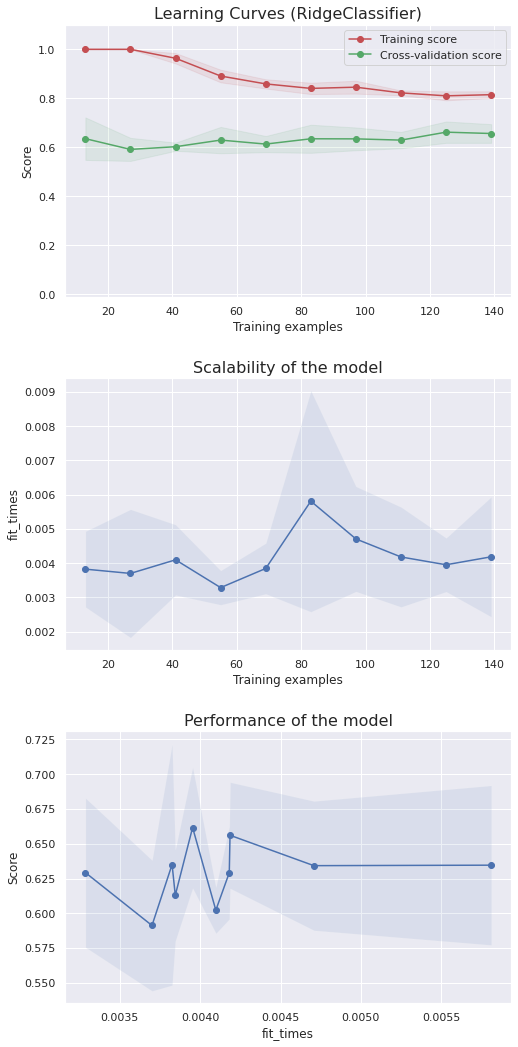




################################################################--------------------#################################################################
###############################################################| LogisticRegression |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,18,6
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.78,0.75,0.77,24.00
Non-case,0.75,0.78,0.77,23.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,47.00
weighted avg,0.77,0.77,0.77,47.00


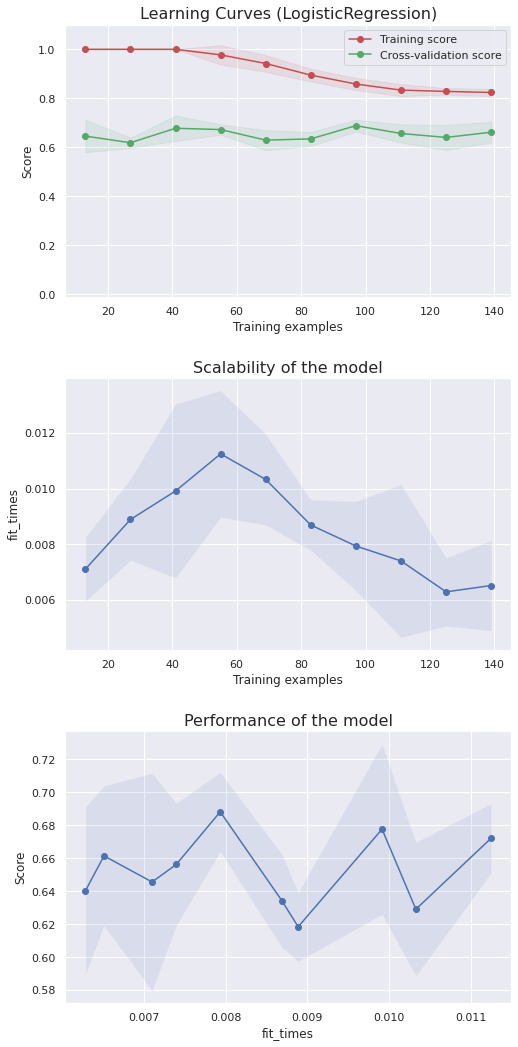




############################################################----------------------------#############################################################
###########################################################| LinearDiscriminantAnalysis |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.62,0.67,24.00
Non-case,0.65,0.74,0.69,23.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.68,0.68,0.68,47.00
weighted avg,0.68,0.68,0.68,47.00


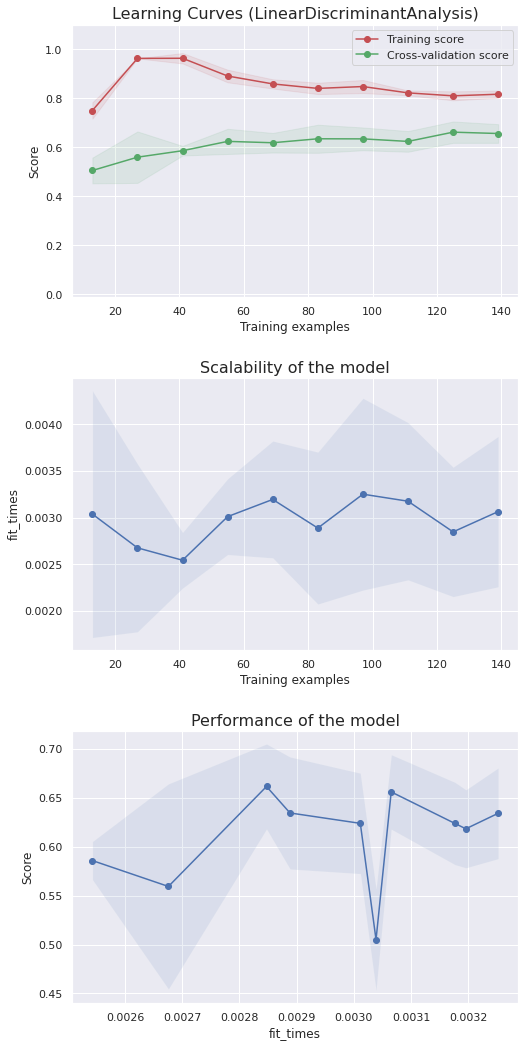




#######################################################################-----#########################################################################
######################################################################| SVC |########################################################################
#######################################################################-----#########################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,14,10
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.70,0.58,0.64,24.00
Non-case,0.63,0.74,0.68,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.67,0.66,0.66,47.00


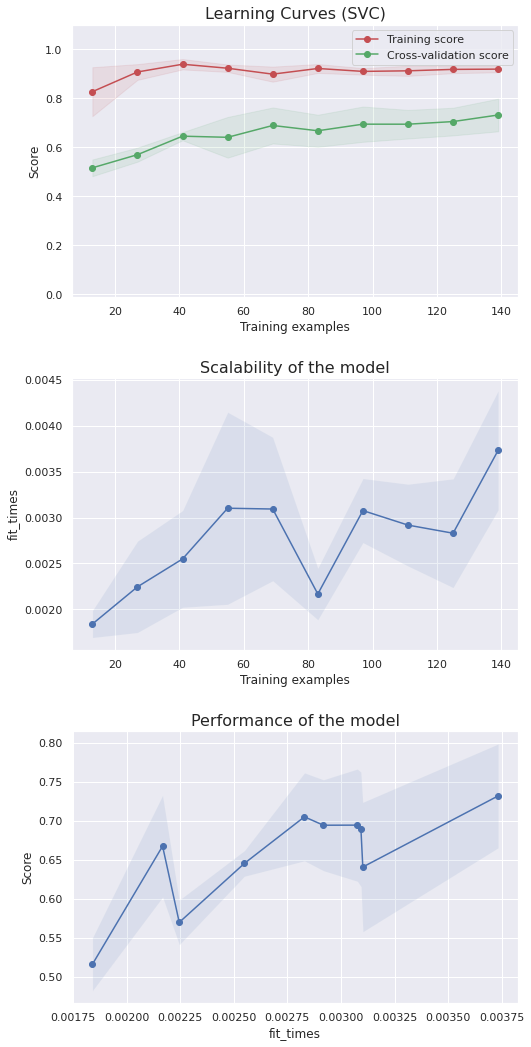




##################################################################---------------####################################################################
#################################################################| SGDClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,17,7
Non-case,7,16



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.71,0.71,24.00
Non-case,0.70,0.70,0.70,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.70,0.70,0.70,47.00
weighted avg,0.70,0.70,0.70,47.00


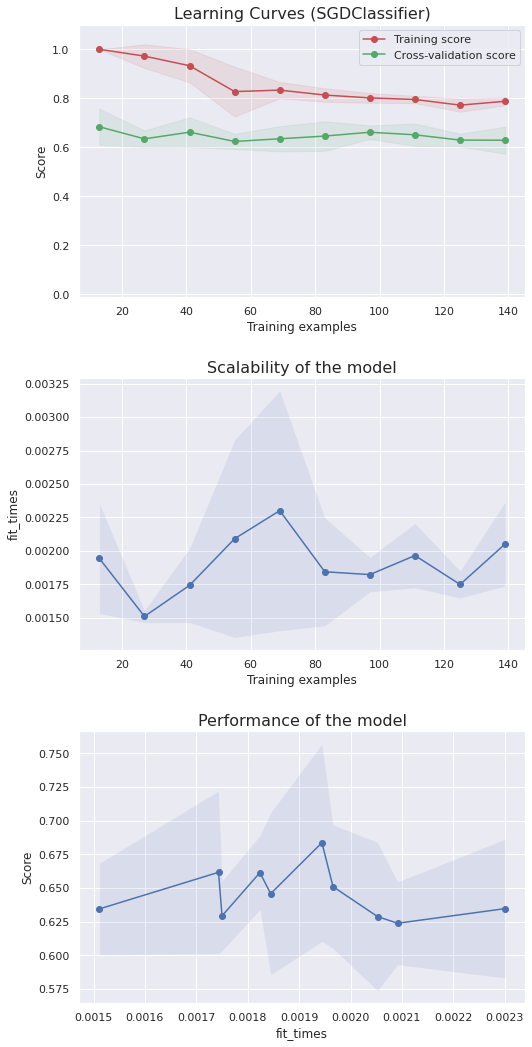




###############################################################----------------------################################################################
##############################################################| KNeighborsClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.50,0.59,24.00
Non-case,0.60,0.78,0.68,23.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.65,0.64,0.63,47.00
weighted avg,0.65,0.64,0.63,47.00


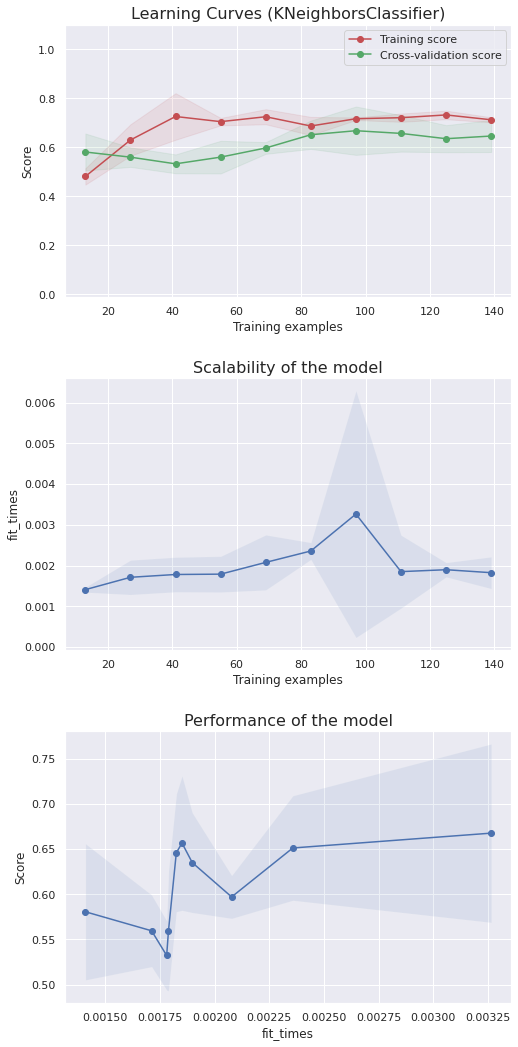




#################################################################-----------------###################################################################
################################################################| NearestCentroid |##################################################################
#################################################################-----------------###################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,18,6
Non-case,8,15



Classification report :


,precision,recall,f1-score,support
Incident,0.69,0.75,0.72,24.00
Non-case,0.71,0.65,0.68,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.70,0.70,0.70,47.00
weighted avg,0.70,0.70,0.70,47.00


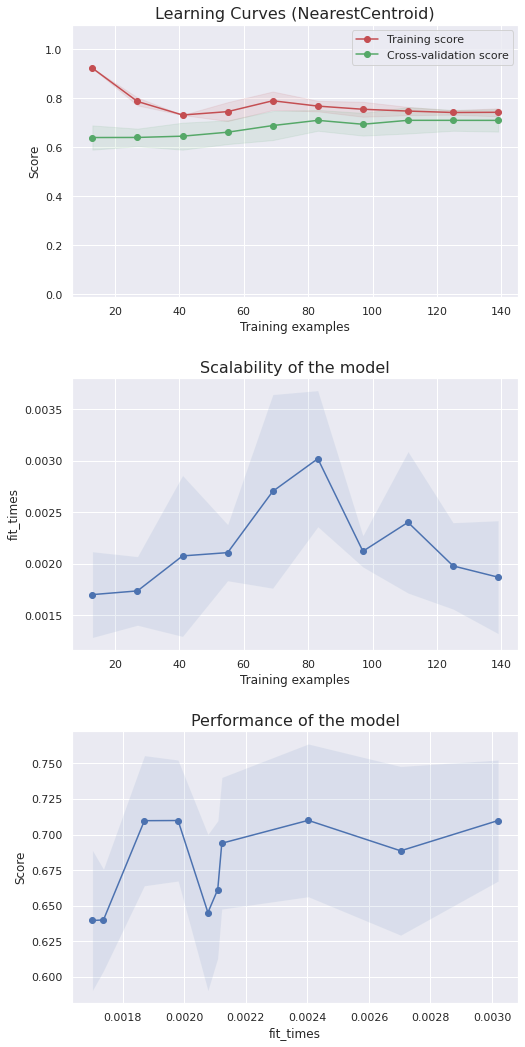




############################################################---------------------------##############################################################
###########################################################| GaussianProcessClassifier |#############################################################
############################################################---------------------------##############################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,7,16



Classification report :


,precision,recall,f1-score,support
Incident,0.68,0.62,0.65,24.00
Non-case,0.64,0.70,0.67,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.66,0.66,0.66,47.00


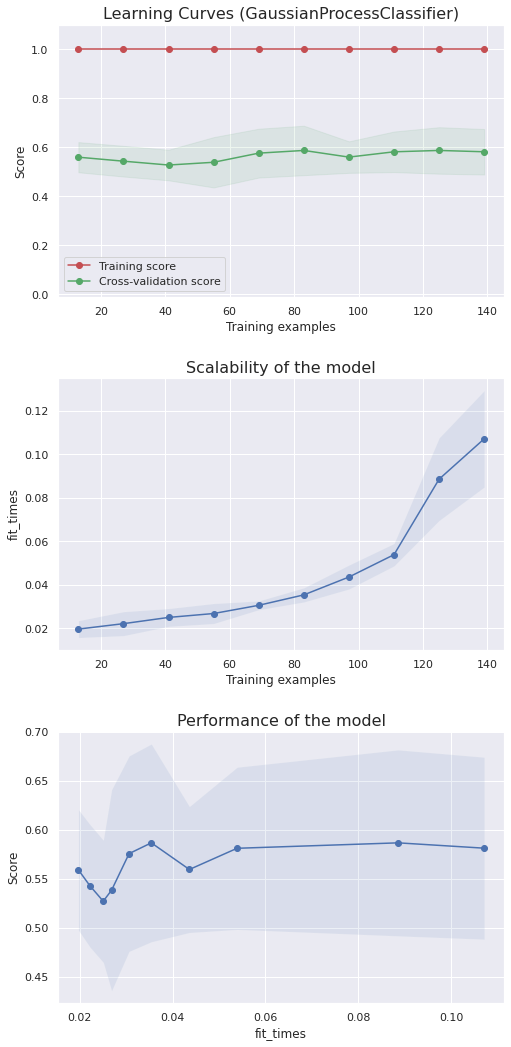




####################################################################------------#####################################################################
###################################################################| GaussianNB |####################################################################
####################################################################------------#####################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,16,8
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.76,0.67,0.71,24.00
Non-case,0.69,0.78,0.73,23.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.73,0.72,0.72,47.00
weighted avg,0.73,0.72,0.72,47.00


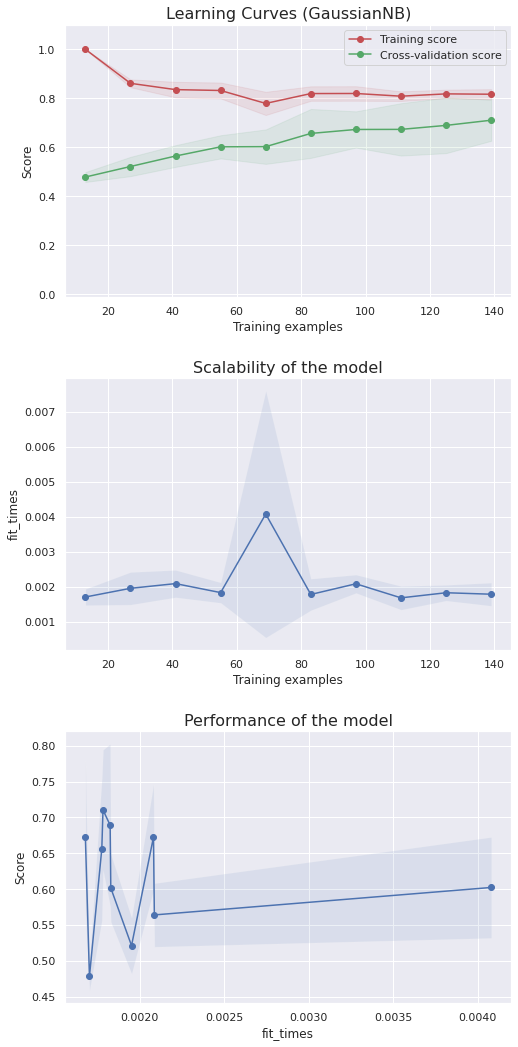




##############################################################------------------------###############################################################
#############################################################| DecisionTreeClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,12,11



Classification report :


,precision,recall,f1-score,support
Incident,0.50,0.50,0.50,24.00
Non-case,0.48,0.48,0.48,23.00
accuracy,0.49,0.49,0.49,0.49
macro avg,0.49,0.49,0.49,47.00
weighted avg,0.49,0.49,0.49,47.00


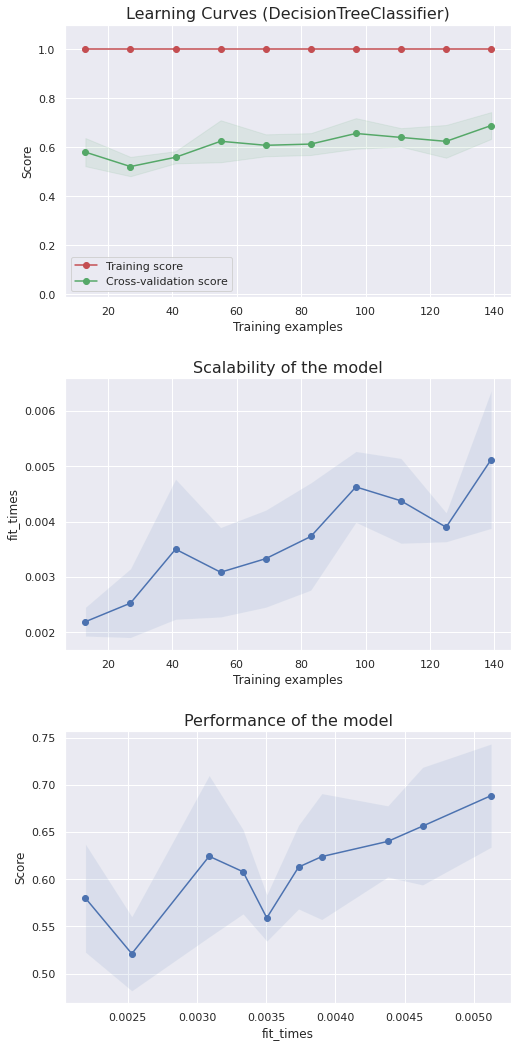




##############################################################------------------------###############################################################
#############################################################| RandomForestClassifier |##############################################################
##############################################################------------------------###############################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,16,8
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.73,0.67,0.70,24.00
Non-case,0.68,0.74,0.71,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.70,0.70,0.70,47.00
weighted avg,0.70,0.70,0.70,47.00


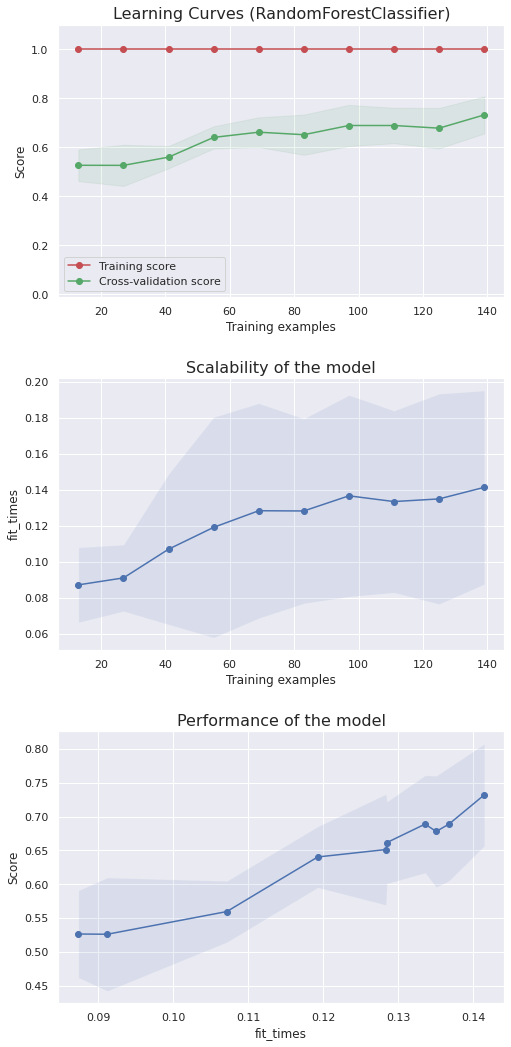




###############################################################----------------------################################################################
##############################################################| ExtraTreesClassifier |###############################################################
###############################################################----------------------################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,14,10
Non-case,6,17



Classification report :


,precision,recall,f1-score,support
Incident,0.70,0.58,0.64,24.00
Non-case,0.63,0.74,0.68,23.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.66,0.66,0.66,47.00
weighted avg,0.67,0.66,0.66,47.00


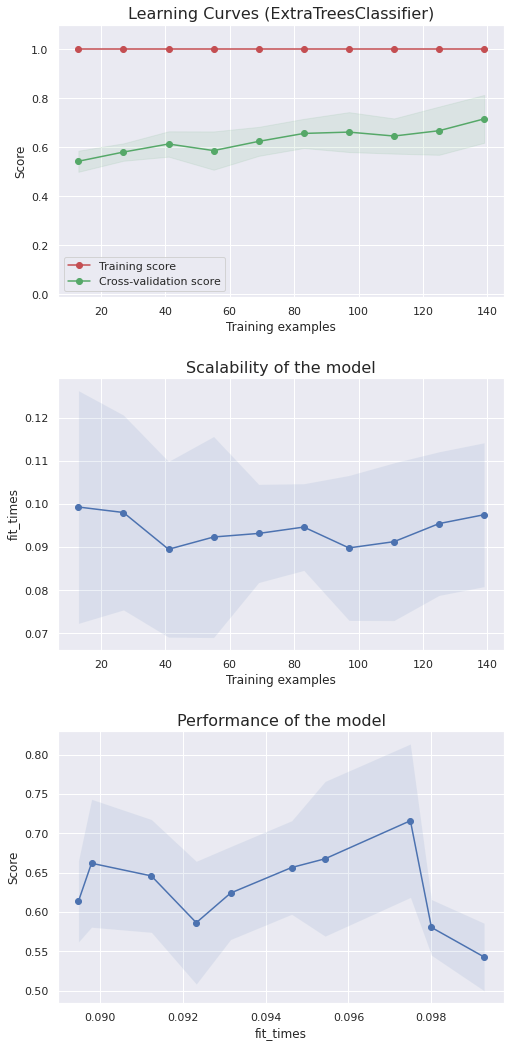




################################################################--------------------#################################################################
###############################################################| AdaBoostClassifier |################################################################
################################################################--------------------#################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,2,21



Classification report :


,precision,recall,f1-score,support
Incident,0.88,0.62,0.73,24.00
Non-case,0.70,0.91,0.79,23.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.79,0.77,0.76,47.00
weighted avg,0.79,0.77,0.76,47.00


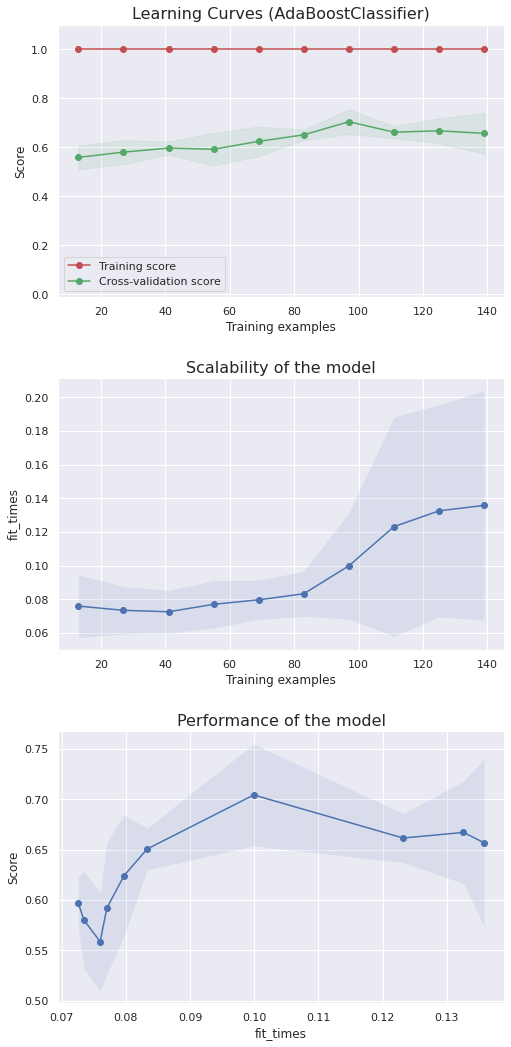




############################################################----------------------------#############################################################
###########################################################| GradientBoostingClassifier |############################################################
############################################################----------------------------#############################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,13,11
Non-case,3,20



Classification report :


,precision,recall,f1-score,support
Incident,0.81,0.54,0.65,24.00
Non-case,0.65,0.87,0.74,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.73,0.71,0.70,47.00
weighted avg,0.73,0.70,0.69,47.00


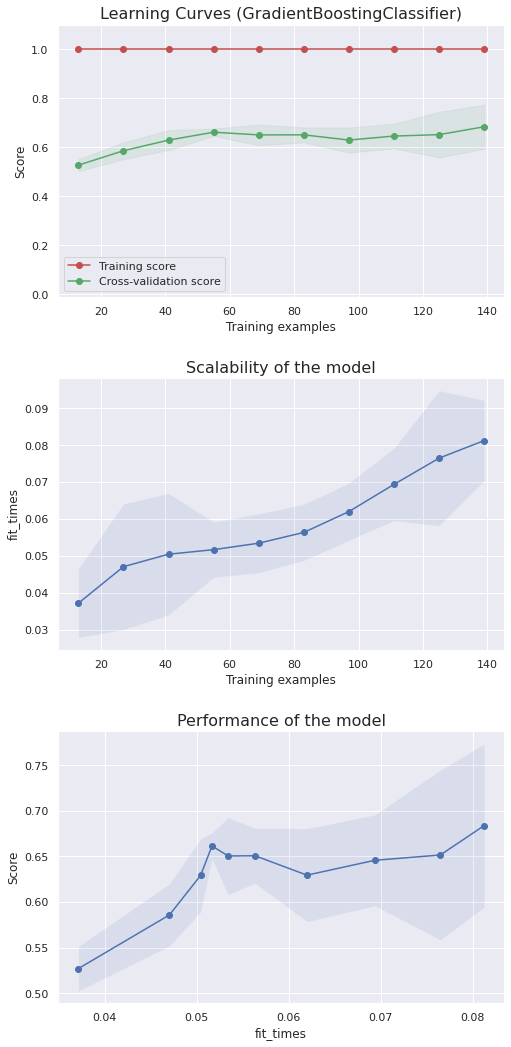




##########################################################--------------------------------###########################################################
#########################################################| HistGradientBoostingClassifier |##########################################################
##########################################################--------------------------------###########################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,12,12
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.71,0.50,0.59,24.00
Non-case,0.60,0.78,0.68,23.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.65,0.64,0.63,47.00
weighted avg,0.65,0.64,0.63,47.00


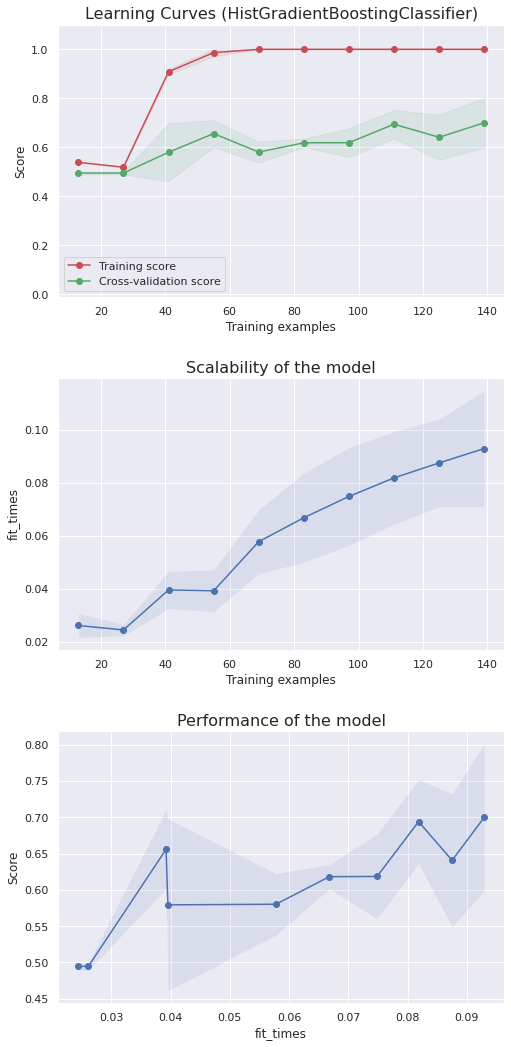




##################################################################---------------####################################################################
#################################################################| MLPClassifier |###################################################################
##################################################################---------------####################################################################

Corresponding classes to labels : {'Incident': 0, 'Non-case': 1}

Confusion matrix :


,Incident,Non-case
true/pred,,
Incident,15,9
Non-case,5,18



Classification report :


,precision,recall,f1-score,support
Incident,0.75,0.62,0.68,24.00
Non-case,0.67,0.78,0.72,23.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.71,0.70,0.70,47.00
weighted avg,0.71,0.70,0.70,47.00


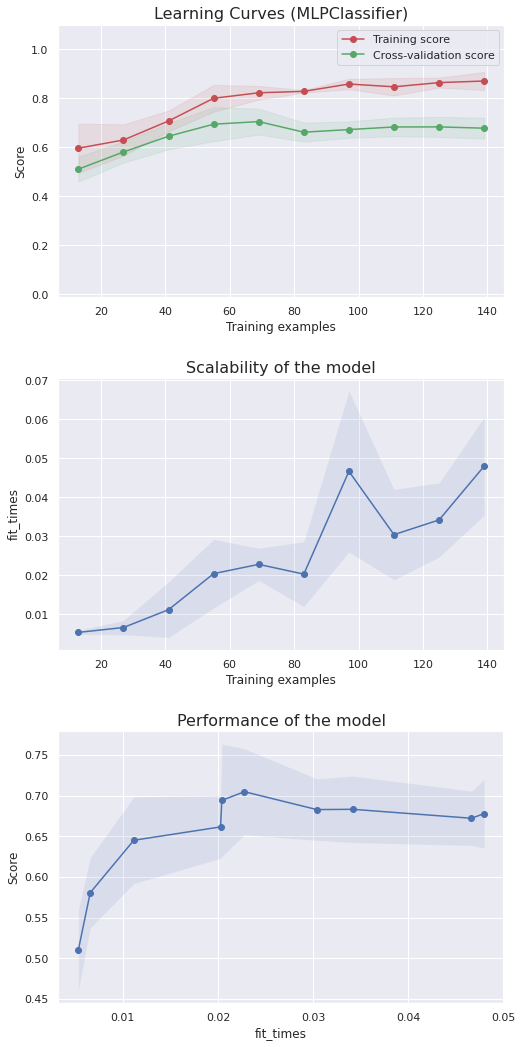




###################################################################################################################################################### 



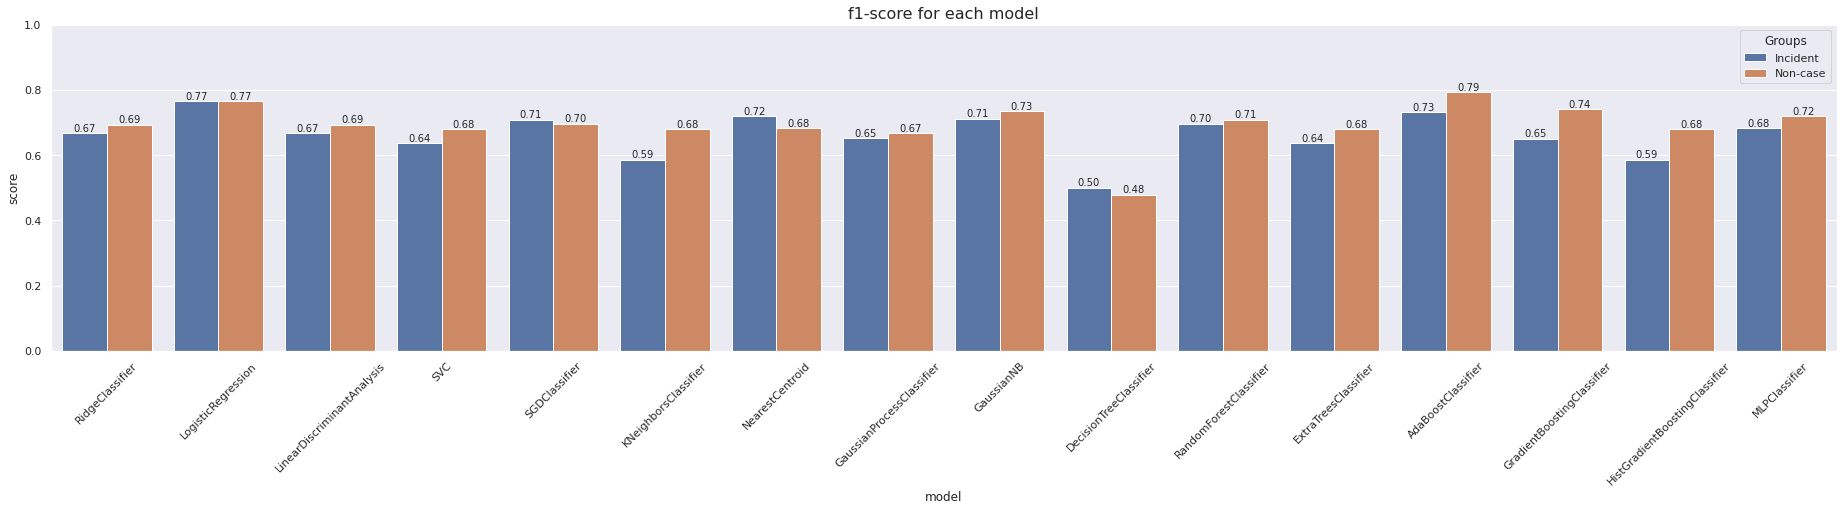


 ######################################################################################################################################################

Time to compute : 00h00m16s

 ######################################################################################################################################################






In [41]:
# Initialise models
RidgeClassifier_ = RidgeClassifier()
LogisticRegression_ = LogisticRegression()
LinearDiscriminantAnalysis_ = LinearDiscriminantAnalysis()
SVC_ = SVC(random_state=0)
SGDClassifier_ = SGDClassifier()
KNeighborsClassifier_ = KNeighborsClassifier()
NearestCentroid_ = NearestCentroid()
GaussianProcessClassifier_ = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))
GaussianNB_ = GaussianNB()
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state=0)
RandomForestClassifier_ = RandomForestClassifier(random_state=0)
ExtraTreesClassifier_ = ExtraTreesClassifier(random_state=0)
AdaBoostClassifier_ = AdaBoostClassifier(random_state=0)
GradientBoostingClassifier_ = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
HistGradientBoostingClassifier_ = HistGradientBoostingClassifier(max_iter=100)
MLPClassifier_ = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)


# Create dict with all models
dict_models = {'RidgeClassifier': RidgeClassifier_,
               'LogisticRegression': LogisticRegression_,
               'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis_,
               'SVC': SVC_,
               'SGDClassifier': SGDClassifier_,
               'KNeighborsClassifier': KNeighborsClassifier_,
               'NearestCentroid': NearestCentroid_,
               'GaussianProcessClassifier': GaussianProcessClassifier_,
               'GaussianNB': GaussianNB_,
               'DecisionTreeClassifier': DecisionTreeClassifier_,
               'RandomForestClassifier': RandomForestClassifier_,
               'ExtraTreesClassifier': ExtraTreesClassifier_,
               'AdaBoostClassifier': AdaBoostClassifier_,
               'GradientBoostingClassifier': GradientBoostingClassifier_,
               'HistGradientBoostingClassifier': HistGradientBoostingClassifier_,
               'MLPClassifier': MLPClassifier_
              }


# Launch classification pipeline
pipeline_classification(X=X, y=peakTable['Groups'], dict_models=dict_models, plot_hist_score=True, score='f1-score')

# TODO : AdaBoost feature importance score

In [49]:
AdaBoostClassifier_.__dict__

{'base_estimator': None,
 'n_estimators': 50,
 'estimator_params': (),
 'learning_rate': 1.0,
 'random_state': 0,
 'algorithm': 'SAMME.R',
 'feature_names_in_': array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
        'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
        'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
        'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31'], dtype=object),
 'n_features_in_': 31,
 'base_estimator_': DecisionTreeClassifier(max_depth=1),
 'estimators_': [DecisionTreeClassifier(max_depth=1, random_state=209652396),
  DecisionTreeClassifier(max_depth=1, random_state=398764591),
  DecisionTreeClassifier(max_depth=1, random_state=924231285),
  DecisionTreeClassifier(max_depth=1, random_state=1478610112),
  DecisionTreeClassifier(max_depth=1, random_state=441365315),
  DecisionTreeClassifier(max_depth=1, random_state=1537364731),
  DecisionTreeClassifier(max_depth=1, random_state=192771779),
  DecisionTreeC

In [44]:
AdaBoostClassifier_.feature_importances_

array([0.04, 0.  , 0.04, 0.  , 0.  , 0.04, 0.1 , 0.04, 0.  , 0.06, 0.02,
       0.04, 0.02, 0.04, 0.04, 0.02, 0.06, 0.02, 0.04, 0.04, 0.  , 0.02,
       0.06, 0.02, 0.02, 0.04, 0.04, 0.06, 0.  , 0.04, 0.04])

In [50]:
len(AdaBoostClassifier_.feature_importances_)

31

In [422]:
df_scores

In [423]:
pd.melt(df_scores.reset_index(), id_vars='index', var_name='model', value_name='score').rename(columns={'index': 'Groups'})

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [ ]:
df_scores_melt = pd.melt(df_scores.reset_index(), id_vars='index', var_name='model', value_name='score').rename(columns={'index': 'Groups'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='model', y='score', hue='Groups', data=df_scores_melt)
for i in range(df_scores.shape[0]):
    ax.bar_label(ax.containers[i], fmt='%.2f')
ax.set(ylim=(0, 1));
ax.set_title('Score for each model', fontsize=16);